In [2]:
# Samples of regressions

# Standard imports to work with datasets, plots, distributions, etc.
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import requests
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.interpolate import *

#loading rcParams from JSON template (created from Federica's fbb_matplotlibrc.json)

url = 'https://s3.amazonaws.com/sb-public/sbg389_matplotlibrc.json'
resp = requests.get(url=url)
data = json.loads(resp.text)
pl.rcParams.update(data)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['polyint', 'griddata', 'insert']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


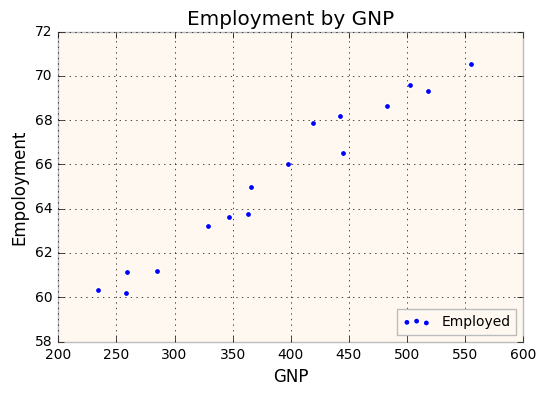

In [16]:
# Example from datarobot https://www.datarobot.com/blog/ordinary-least-squares-in-python/

# Load data

df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()


pl.ylabel("Empoloyment")
pl.xlabel("GNP")
pl.scatter(df.GNP, df.Employed)
#pl.plot([0, 45000], [0, 45000])
pl.legend(loc="lower right")
pl.title('Employment by GNP')
#pl.size=15,15
#pl.text(0, -12000, "Figure 1. Scatter plot of Emplyment by GNP")

In [8]:
# Will use the GNP as the predictor for employed
# prepare the data

y = df.Employed  # response
X = df.GNP  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


In [42]:
# use the sm OLS method passing the y (existing data for what i want to predict) and the predictor X
est = (sm.OLS(y, X))

# run the fit method
est = est.fit()
est.summary()

# with polyfit

#Using np.p
m, b = np.polyfit(df.GNP,y,1)

print (m, b)


(0.03475229434762897, 51.843589781884198)


const    51.843590
GNP       0.034752
dtype: float64


array([ 72.69496639])

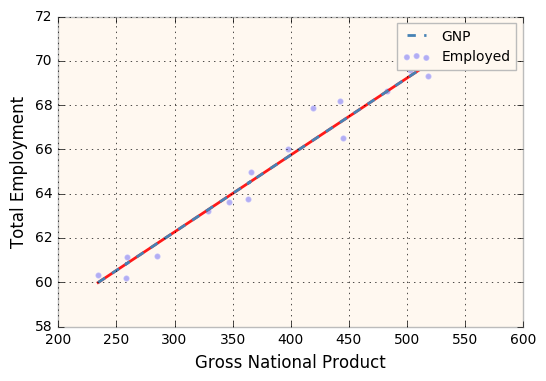

In [45]:
# get the coeficients of the fit
print (est.params)

# Pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red
pl.plot(df.GNP, m * df.GNP + b, '--')
pl.legend()

# Predict a single value 
# http://stackoverflow.com/questions/39714057/
# what-is-first-value-that-is-passed-into-statsmodels-predict-function

# Whats the total employment with a GDP of 600?
est.predict([1,600])

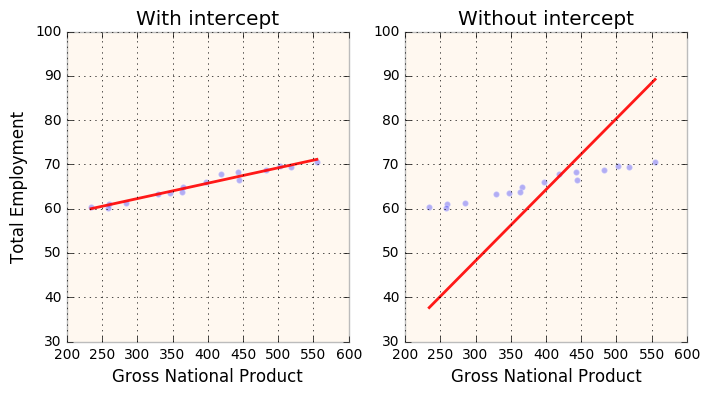

In [32]:
import statsmodels.formula.api as smf

# using smf.ols
# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()

# the -1 parameter takes out the constant for the intercept
est_no_int = smf.ols(formula='Employed ~ GNP -1', data=df).fit()

est.summary()

# We pick 100 hundred points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1)  # add constant as we did before

y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)

fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)

splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.ylim(30, 100)  # Set the y-axis to be the same
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.title("With intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9)  # Add the regression line, colored in red

splt = plt.subplot(122)
splt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.title("Without intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9)  # Add the regression line, colored in red